In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from matplotlib import patches
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import os
import math
import random

import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.metrics import roc_curve, roc_auc_score, auc

import scipy.stats as st
from scipy.stats import poisson
from scipy.interpolate import interp1d
from scipy.stats import norm

In [2]:
from sklearn.neighbors import KernelDensity # paquete necesario
from sklearn.model_selection import GridSearchCV

import scipy.integrate as integrate

### LOAD

In [3]:
# LQ800_results_16bins_beta = np.loadtxt('saved-results/LQup800GeV.txt')[0]
# LQ800_results_16bins_beta_plus = np.loadtxt('saved-results/LQup800GeV.txt')[1]
# LQ800_results_16bins_beta_min = np.loadtxt('saved-results/LQup800GeV.txt')[2]

# LQ800_results_MLL_KDE_beta = np.loadtxt('saved-results/LQup800GeV.txt')[9]
# LQ800_results_MLL_KDE_beta_plus = np.loadtxt('saved-results/LQup800GeV.txt')[10]
# LQ800_results_MLL_KDE_beta_min = np.loadtxt('saved-results/LQup800GeV.txt')[11]

In [4]:
LQ1000_results_16bins_beta = np.loadtxt('saved-results/LQup1000GeV.txt')[0]
LQ1000_results_16bins_beta_plus = np.loadtxt('saved-results/LQup1000GeV.txt')[1]
LQ1000_results_16bins_beta_min = np.loadtxt('saved-results/LQup1000GeV.txt')[2]

LQ1000_results_MLL_KDE_beta = np.loadtxt('saved-results/LQup1000GeV.txt')[9]
LQ1000_results_MLL_KDE_beta_plus = np.loadtxt('saved-results/LQup1000GeV.txt')[10]
LQ1000_results_MLL_KDE_beta_min = np.loadtxt('saved-results/LQup1000GeV.txt')[11]

In [5]:
LQ1200_results_16bins_beta = np.loadtxt('saved-results/LQup1200GeV.txt')[0]
LQ1200_results_16bins_beta_plus = np.loadtxt('saved-results/LQup1200GeV.txt')[1]
LQ1200_results_16bins_beta_min = np.loadtxt('saved-results/LQup1200GeV.txt')[2]

LQ1200_results_MLL_KDE_beta = np.loadtxt('saved-results/LQup1200GeV.txt')[9]
LQ1200_results_MLL_KDE_beta_plus = np.loadtxt('saved-results/LQup1200GeV.txt')[10]
LQ1200_results_MLL_KDE_beta_min = np.loadtxt('saved-results/LQup1200GeV.txt')[11]

In [6]:
LQ1400_results_16bins_beta = np.loadtxt('saved-results/LQup1400GeV.txt')[0]
LQ1400_results_16bins_beta_plus = np.loadtxt('saved-results/LQup1400GeV.txt')[1]
LQ1400_results_16bins_beta_min = np.loadtxt('saved-results/LQup1400GeV.txt')[2]

LQ1400_results_MLL_KDE_beta = np.loadtxt('saved-results/LQup1400GeV.txt')[9]
LQ1400_results_MLL_KDE_beta_plus = np.loadtxt('saved-results/LQup1400GeV.txt')[10]
LQ1400_results_MLL_KDE_beta_min = np.loadtxt('saved-results/LQup1400GeV.txt')[11]

In [7]:
LQ1600_results_16bins_beta = np.loadtxt('saved-results/LQup1600GeV.txt')[0]
LQ1600_results_16bins_beta_plus = np.loadtxt('saved-results/LQup1600GeV.txt')[1]
LQ1600_results_16bins_beta_min = np.loadtxt('saved-results/LQup1600GeV.txt')[2]

LQ1600_results_MLL_KDE_beta = np.loadtxt('saved-results/LQup1600GeV.txt')[9]
LQ1600_results_MLL_KDE_beta_plus = np.loadtxt('saved-results/LQup1600GeV.txt')[10]
LQ1600_results_MLL_KDE_beta_min = np.loadtxt('saved-results/LQup1600GeV.txt')[11]

In [8]:
LQ1800_results_16bins_beta = np.loadtxt('saved-results/LQup1800GeV.txt')[0]
LQ1800_results_16bins_beta_plus = np.loadtxt('saved-results/LQup1800GeV.txt')[1]
LQ1800_results_16bins_beta_min = np.loadtxt('saved-results/LQup1800GeV.txt')[2]

LQ1800_results_MLL_KDE_beta = np.loadtxt('saved-results/LQup1800GeV.txt')[9]
LQ1800_results_MLL_KDE_beta_plus = np.loadtxt('saved-results/LQup1800GeV.txt')[10]
LQ1800_results_MLL_KDE_beta_min = np.loadtxt('saved-results/LQup1800GeV.txt')[11]

In [9]:
results_16bins_beta00 = [LQ1000_results_16bins_beta[0],LQ1200_results_16bins_beta[0],LQ1400_results_16bins_beta[0],LQ1600_results_16bins_beta[0],LQ1800_results_16bins_beta[0]]
results_16bins_plus_beta00 = [LQ1000_results_16bins_beta_plus[0],LQ1200_results_16bins_beta_plus[0],LQ1400_results_16bins_beta_plus[0],LQ1600_results_16bins_beta_plus[0],LQ1800_results_16bins_beta_plus[0]]
results_16bins_min_beta00 = [LQ1000_results_16bins_beta_min[0],LQ1200_results_16bins_beta_min[0],LQ1400_results_16bins_beta_min[0],LQ1600_results_16bins_beta_min[0],LQ1800_results_16bins_beta_min[0]]

results_MLL_KDE_beta00 = [LQ1000_results_MLL_KDE_beta[0],LQ1200_results_MLL_KDE_beta[0],LQ1400_results_MLL_KDE_beta[0],LQ1600_results_MLL_KDE_beta[0],LQ1800_results_MLL_KDE_beta[0]]
results_MLL_KDE_plus_beta00 = [LQ1000_results_MLL_KDE_beta_plus[0],LQ1200_results_MLL_KDE_beta_plus[0],LQ1400_results_MLL_KDE_beta_plus[0],LQ1600_results_MLL_KDE_beta_plus[0],LQ1800_results_MLL_KDE_beta_plus[0]]
results_MLL_KDE_min_beta00 = [LQ1000_results_MLL_KDE_beta_min[0],LQ1200_results_MLL_KDE_beta_min[0],LQ1400_results_MLL_KDE_beta_min[0],LQ1600_results_MLL_KDE_beta_min[0],LQ1800_results_MLL_KDE_beta_min[0]]


results_16bins_beta01 = [LQ1000_results_16bins_beta[1],LQ1200_results_16bins_beta[1],LQ1400_results_16bins_beta[1],LQ1600_results_16bins_beta[1],LQ1800_results_16bins_beta[1]]
results_16bins_plus_beta01 = [LQ1000_results_16bins_beta_plus[1],LQ1200_results_16bins_beta_plus[1],LQ1400_results_16bins_beta_plus[1],LQ1600_results_16bins_beta_plus[1],LQ1800_results_16bins_beta_plus[1]]
results_16bins_min_beta01 = [LQ1000_results_16bins_beta_min[1],LQ1200_results_16bins_beta_min[1],LQ1400_results_16bins_beta_min[1],LQ1600_results_16bins_beta_min[1],LQ1800_results_16bins_beta_min[1]]

results_MLL_KDE_beta01 = [LQ1000_results_MLL_KDE_beta[1],LQ1200_results_MLL_KDE_beta[1],LQ1400_results_MLL_KDE_beta[1],LQ1600_results_MLL_KDE_beta[1],LQ1800_results_MLL_KDE_beta[1]]
results_MLL_KDE_plus_beta01 = [LQ1000_results_MLL_KDE_beta_plus[1],LQ1200_results_MLL_KDE_beta_plus[1],LQ1400_results_MLL_KDE_beta_plus[1],LQ1600_results_MLL_KDE_beta_plus[1],LQ1800_results_MLL_KDE_beta_plus[1]]
results_MLL_KDE_min_beta01 = [LQ1000_results_MLL_KDE_beta_min[1],LQ1200_results_MLL_KDE_beta_min[1],LQ1400_results_MLL_KDE_beta_min[1],LQ1600_results_MLL_KDE_beta_min[1],LQ1800_results_MLL_KDE_beta_min[1]]


results_16bins_beta03 = [LQ1000_results_16bins_beta[2],LQ1200_results_16bins_beta[2],LQ1400_results_16bins_beta[2],LQ1600_results_16bins_beta[2],LQ1800_results_16bins_beta[2]]
results_16bins_plus_beta03 = [LQ1000_results_16bins_beta_plus[2],LQ1200_results_16bins_beta_plus[2],LQ1400_results_16bins_beta_plus[2],LQ1600_results_16bins_beta_plus[2],LQ1800_results_16bins_beta_plus[2]]
results_16bins_min_beta03 = [LQ1000_results_16bins_beta_min[2],LQ1200_results_16bins_beta_min[2],LQ1400_results_16bins_beta_min[2],LQ1600_results_16bins_beta_min[2],LQ1800_results_16bins_beta_min[2]]

results_MLL_KDE_beta03 = [LQ1000_results_MLL_KDE_beta[2],LQ1200_results_MLL_KDE_beta[2],LQ1400_results_MLL_KDE_beta[2],LQ1600_results_MLL_KDE_beta[2],LQ1800_results_MLL_KDE_beta[2]]
results_MLL_KDE_plus_beta03 = [LQ1000_results_MLL_KDE_beta_plus[2],LQ1200_results_MLL_KDE_beta_plus[2],LQ1400_results_MLL_KDE_beta_plus[2],LQ1600_results_MLL_KDE_beta_plus[2],LQ1800_results_MLL_KDE_beta_plus[2]]
results_MLL_KDE_min_beta03 = [LQ1000_results_MLL_KDE_beta_min[2],LQ1200_results_MLL_KDE_beta_min[2],LQ1400_results_MLL_KDE_beta_min[2],LQ1600_results_MLL_KDE_beta_min[2],LQ1800_results_MLL_KDE_beta_min[2]]


results_16bins_beta05 = [LQ1000_results_16bins_beta[3],LQ1200_results_16bins_beta[3],LQ1400_results_16bins_beta[3],LQ1600_results_16bins_beta[3],LQ1800_results_16bins_beta[3]]
results_16bins_plus_beta05 = [LQ1000_results_16bins_beta_plus[3],LQ1200_results_16bins_beta_plus[3],LQ1400_results_16bins_beta_plus[3],LQ1600_results_16bins_beta_plus[3],LQ1800_results_16bins_beta_plus[3]]
results_16bins_min_beta05 = [LQ1000_results_16bins_beta_min[3],LQ1200_results_16bins_beta_min[3],LQ1400_results_16bins_beta_min[3],LQ1600_results_16bins_beta_min[3],LQ1800_results_16bins_beta_min[3]]

results_MLL_KDE_beta05 = [LQ1000_results_MLL_KDE_beta[3],LQ1200_results_MLL_KDE_beta[3],LQ1400_results_MLL_KDE_beta[3],LQ1600_results_MLL_KDE_beta[3],LQ1800_results_MLL_KDE_beta[3]]
results_MLL_KDE_plus_beta05 = [LQ1000_results_MLL_KDE_beta_plus[3],LQ1200_results_MLL_KDE_beta_plus[3],LQ1400_results_MLL_KDE_beta_plus[3],LQ1600_results_MLL_KDE_beta_plus[3],LQ1800_results_MLL_KDE_beta_plus[3]]
results_MLL_KDE_min_beta05 = [LQ1000_results_MLL_KDE_beta_min[3],LQ1200_results_MLL_KDE_beta_min[3],LQ1400_results_MLL_KDE_beta_min[3],LQ1600_results_MLL_KDE_beta_min[3],LQ1800_results_MLL_KDE_beta_min[3]]


results_16bins_beta07 = [LQ1000_results_16bins_beta[4],LQ1200_results_16bins_beta[4],LQ1400_results_16bins_beta[4],LQ1600_results_16bins_beta[4],LQ1800_results_16bins_beta[4]]
results_16bins_plus_beta07 = [LQ1000_results_16bins_beta_plus[4],LQ1200_results_16bins_beta_plus[4],LQ1400_results_16bins_beta_plus[4],LQ1600_results_16bins_beta_plus[4],LQ1800_results_16bins_beta_plus[4]]
results_16bins_min_beta07 = [LQ1000_results_16bins_beta_min[4],LQ1200_results_16bins_beta_min[4],LQ1400_results_16bins_beta_min[4],LQ1600_results_16bins_beta_min[4],LQ1800_results_16bins_beta_min[4]]

results_MLL_KDE_beta07 = [LQ1000_results_MLL_KDE_beta[4],LQ1200_results_MLL_KDE_beta[4],LQ1400_results_MLL_KDE_beta[4],LQ1600_results_MLL_KDE_beta[4],LQ1800_results_MLL_KDE_beta[4]]
results_MLL_KDE_plus_beta07 = [LQ1000_results_MLL_KDE_beta_plus[4],LQ1200_results_MLL_KDE_beta_plus[4],LQ1400_results_MLL_KDE_beta_plus[4],LQ1600_results_MLL_KDE_beta_plus[4],LQ1800_results_MLL_KDE_beta_plus[4]]
results_MLL_KDE_min_beta07 = [LQ1000_results_MLL_KDE_beta_min[4],LQ1200_results_MLL_KDE_beta_min[4],LQ1400_results_MLL_KDE_beta_min[4],LQ1600_results_MLL_KDE_beta_min[4],LQ1800_results_MLL_KDE_beta_min[4]]


results_16bins_beta09 = [LQ1000_results_16bins_beta[5],LQ1200_results_16bins_beta[5],LQ1400_results_16bins_beta[5],LQ1600_results_16bins_beta[5],LQ1800_results_16bins_beta[5]]
results_16bins_plus_beta09 = [LQ1000_results_16bins_beta_plus[5],LQ1200_results_16bins_beta_plus[5],LQ1400_results_16bins_beta_plus[5],LQ1600_results_16bins_beta_plus[5],LQ1800_results_16bins_beta_plus[5]]
results_16bins_min_beta09 = [LQ1000_results_16bins_beta_min[5],LQ1200_results_16bins_beta_min[5],LQ1400_results_16bins_beta_min[5],LQ1600_results_16bins_beta_min[5],LQ1800_results_16bins_beta_min[5]]

results_MLL_KDE_beta09 = [LQ1000_results_MLL_KDE_beta[5],LQ1200_results_MLL_KDE_beta[5],LQ1400_results_MLL_KDE_beta[5],LQ1600_results_MLL_KDE_beta[5],LQ1800_results_MLL_KDE_beta[5]]
results_MLL_KDE_plus_beta09 = [LQ1000_results_MLL_KDE_beta_plus[5],LQ1200_results_MLL_KDE_beta_plus[5],LQ1400_results_MLL_KDE_beta_plus[5],LQ1600_results_MLL_KDE_beta_plus[5],LQ1800_results_MLL_KDE_beta_plus[5]]
results_MLL_KDE_min_beta09 = [LQ1000_results_MLL_KDE_beta_min[5],LQ1200_results_MLL_KDE_beta_min[5],LQ1400_results_MLL_KDE_beta_min[5],LQ1600_results_MLL_KDE_beta_min[5],LQ1800_results_MLL_KDE_beta_min[5]]


results_16bins_beta1 = [LQ1000_results_16bins_beta[6],LQ1200_results_16bins_beta[6],LQ1400_results_16bins_beta[6],LQ1600_results_16bins_beta[6],LQ1800_results_16bins_beta[6]]
results_16bins_plus_beta1 = [LQ1000_results_16bins_beta_plus[6],LQ1200_results_16bins_beta_plus[6],LQ1400_results_16bins_beta_plus[6],LQ1600_results_16bins_beta_plus[6],LQ1800_results_16bins_beta_plus[6]]
results_16bins_min_beta1 = [LQ1000_results_16bins_beta_min[6],LQ1200_results_16bins_beta_min[6],LQ1400_results_16bins_beta_min[6],LQ1600_results_16bins_beta_min[6],LQ1800_results_16bins_beta_min[6]]

results_MLL_KDE_beta1 = [LQ1000_results_MLL_KDE_beta[6],LQ1200_results_MLL_KDE_beta[6],LQ1400_results_MLL_KDE_beta[6],LQ1600_results_MLL_KDE_beta[6],LQ1800_results_MLL_KDE_beta[6]]
results_MLL_KDE_plus_beta1 = [LQ1000_results_MLL_KDE_beta_plus[6],LQ1200_results_MLL_KDE_beta_plus[6],LQ1400_results_MLL_KDE_beta_plus[6],LQ1600_results_MLL_KDE_beta_plus[6],LQ1800_results_MLL_KDE_beta_plus[6]]
results_MLL_KDE_min_beta1 = [LQ1000_results_MLL_KDE_beta_min[6],LQ1200_results_MLL_KDE_beta_min[6],LQ1400_results_MLL_KDE_beta_min[6],LQ1600_results_MLL_KDE_beta_min[6],LQ1800_results_MLL_KDE_beta_min[6]]

In [10]:
results_16bins_beta00.append( (results_16bins_beta00[-1] - results_16bins_beta00[-2]) + results_16bins_beta00[-1] )
results_16bins_plus_beta00.append( (results_16bins_plus_beta00[-1] - results_16bins_plus_beta00[-2]) + results_16bins_plus_beta00[-1] )
results_16bins_min_beta00.append( (results_16bins_min_beta00[-1] - results_16bins_min_beta00[-2]) + results_16bins_min_beta00[-1] )

results_MLL_KDE_beta00.append( (results_MLL_KDE_beta00[-1] - results_MLL_KDE_beta00[-2]) + results_MLL_KDE_beta00[-1] )
results_MLL_KDE_plus_beta00.append( (results_MLL_KDE_plus_beta00[-1] - results_MLL_KDE_plus_beta00[-2]) + results_MLL_KDE_plus_beta00[-1] )
results_MLL_KDE_min_beta00.append( (results_MLL_KDE_min_beta00[-1] - results_MLL_KDE_min_beta00[-2]) + results_MLL_KDE_min_beta00[-1] )


results_16bins_beta01.append( (results_16bins_beta01[-1] - results_16bins_beta01[-2]) + results_16bins_beta01[-1] )
results_16bins_plus_beta01.append( (results_16bins_plus_beta01[-1] - results_16bins_plus_beta01[-2]) + results_16bins_plus_beta01[-1] )
results_16bins_min_beta01.append( (results_16bins_min_beta01[-1] - results_16bins_min_beta01[-2]) + results_16bins_min_beta01[-1] )

results_MLL_KDE_beta01.append( (results_MLL_KDE_beta01[-1] - results_MLL_KDE_beta01[-2]) + results_MLL_KDE_beta01[-1] )
results_MLL_KDE_plus_beta01.append( (results_MLL_KDE_plus_beta01[-1] - results_MLL_KDE_plus_beta01[-2]) + results_MLL_KDE_plus_beta01[-1] )
results_MLL_KDE_min_beta01.append( (results_MLL_KDE_min_beta01[-1] - results_MLL_KDE_min_beta01[-2]) + results_MLL_KDE_min_beta01[-1] )


results_16bins_beta03.append( (results_16bins_beta03[-1] - results_16bins_beta03[-2]) + results_16bins_beta03[-1] )
results_16bins_plus_beta03.append( (results_16bins_plus_beta03[-1] - results_16bins_plus_beta03[-2]) + results_16bins_plus_beta03[-1] )
results_16bins_min_beta03.append( (results_16bins_min_beta03[-1] - results_16bins_min_beta03[-2]) + results_16bins_min_beta03[-1] )

results_MLL_KDE_beta03.append( (results_MLL_KDE_beta03[-1] - results_MLL_KDE_beta03[-2]) + results_MLL_KDE_beta03[-1] )
results_MLL_KDE_plus_beta03.append( (results_MLL_KDE_plus_beta03[-1] - results_MLL_KDE_plus_beta03[-2]) + results_MLL_KDE_plus_beta03[-1] )
results_MLL_KDE_min_beta03.append( (results_MLL_KDE_min_beta03[-1] - results_MLL_KDE_min_beta03[-2]) + results_MLL_KDE_min_beta03[-1] )


results_16bins_beta05.append( (results_16bins_beta05[-1] - results_16bins_beta05[-2]) + results_16bins_beta05[-1] )
results_16bins_plus_beta05.append( (results_16bins_plus_beta05[-1] - results_16bins_plus_beta05[-2]) + results_16bins_plus_beta05[-1] )
results_16bins_min_beta05.append( (results_16bins_min_beta05[-1] - results_16bins_min_beta05[-2]) + results_16bins_min_beta05[-1] )

results_MLL_KDE_beta05.append( (results_MLL_KDE_beta05[-1] - results_MLL_KDE_beta05[-2]) + results_MLL_KDE_beta05[-1] )
results_MLL_KDE_plus_beta05.append( (results_MLL_KDE_plus_beta05[-1] - results_MLL_KDE_plus_beta05[-2]) + results_MLL_KDE_plus_beta05[-1] )
results_MLL_KDE_min_beta05.append( (results_MLL_KDE_min_beta05[-1] - results_MLL_KDE_min_beta05[-2]) + results_MLL_KDE_min_beta05[-1] )


results_16bins_beta07.append( (results_16bins_beta07[-1] - results_16bins_beta07[-2]) + results_16bins_beta07[-1] )
results_16bins_plus_beta07.append( (results_16bins_plus_beta07[-1] - results_16bins_plus_beta07[-2]) + results_16bins_plus_beta07[-1] )
results_16bins_min_beta07.append( (results_16bins_min_beta07[-1] - results_16bins_min_beta07[-2]) + results_16bins_min_beta07[-1] )

results_MLL_KDE_beta07.append( (results_MLL_KDE_beta07[-1] - results_MLL_KDE_beta07[-2]) + results_MLL_KDE_beta07[-1] )
results_MLL_KDE_plus_beta07.append( (results_MLL_KDE_plus_beta07[-1] - results_MLL_KDE_plus_beta07[-2]) + results_MLL_KDE_plus_beta07[-1] )
results_MLL_KDE_min_beta07.append( (results_MLL_KDE_min_beta07[-1] - results_MLL_KDE_min_beta07[-2]) + results_MLL_KDE_min_beta07[-1] )


results_16bins_beta09.append( (results_16bins_beta09[-1] - results_16bins_beta09[-2]) + results_16bins_beta09[-1] )
results_16bins_plus_beta09.append( (results_16bins_plus_beta09[-1] - results_16bins_plus_beta09[-2]) + results_16bins_plus_beta09[-1] )
results_16bins_min_beta09.append( (results_16bins_min_beta09[-1] - results_16bins_min_beta09[-2]) + results_16bins_min_beta09[-1] )

results_MLL_KDE_beta09.append( (results_MLL_KDE_beta09[-1] - results_MLL_KDE_beta09[-2]) + results_MLL_KDE_beta09[-1] )
results_MLL_KDE_plus_beta09.append( (results_MLL_KDE_plus_beta09[-1] - results_MLL_KDE_plus_beta09[-2]) + results_MLL_KDE_plus_beta09[-1] )
results_MLL_KDE_min_beta09.append( (results_MLL_KDE_min_beta09[-1] - results_MLL_KDE_min_beta09[-2]) + results_MLL_KDE_min_beta09[-1] )


results_16bins_beta1.append( (results_16bins_beta1[-1] - results_16bins_beta1[-2]) + results_16bins_beta1[-1] )
results_16bins_plus_beta1.append( (results_16bins_plus_beta1[-1] - results_16bins_plus_beta1[-2]) + results_16bins_plus_beta1[-1] )
results_16bins_min_beta1.append( (results_16bins_min_beta1[-1] - results_16bins_min_beta1[-2]) + results_16bins_min_beta1[-1] )

results_MLL_KDE_beta1.append( (results_MLL_KDE_beta1[-1] - results_MLL_KDE_beta1[-2]) + results_MLL_KDE_beta1[-1] )
results_MLL_KDE_plus_beta1.append( (results_MLL_KDE_plus_beta1[-1] - results_MLL_KDE_plus_beta1[-2]) + results_MLL_KDE_plus_beta1[-1] )
results_MLL_KDE_min_beta1.append( (results_MLL_KDE_min_beta1[-1] - results_MLL_KDE_min_beta1[-2]) + results_MLL_KDE_min_beta1[-1] )

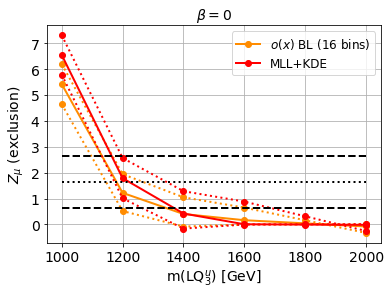

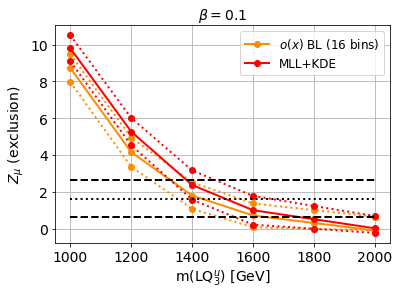

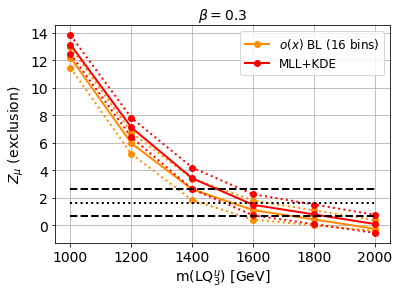

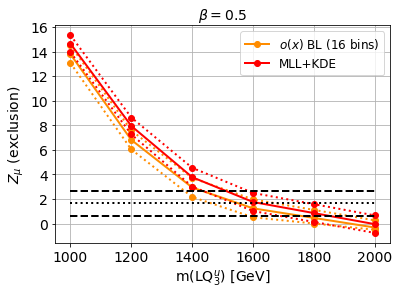

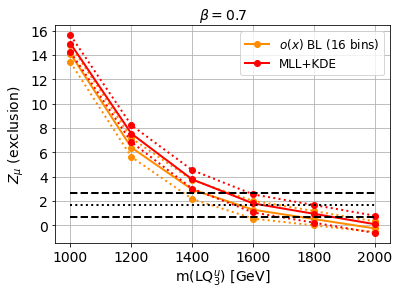

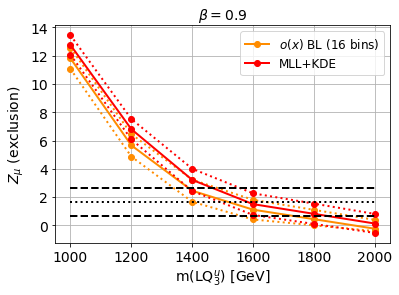

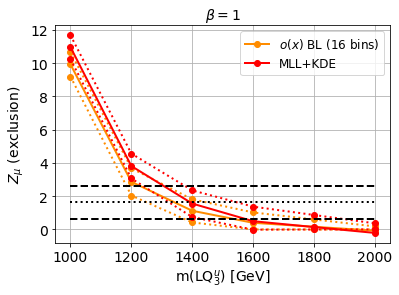

In [11]:
#masses = [800, 1000, 1200, 1400, 1600, 1800]
masses = [1000, 1200, 1400, 1600, 1800, 2000]

Z164 = [1.64 for x in masses]
Z264 = [2.64 for x in masses]
Z064 = [0.64 for x in masses]

lw=2
plt.plot(masses, results_16bins_beta00, '-o', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(masses, results_16bins_plus_beta00, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_16bins_min_beta00, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_MLL_KDE_beta00, '-o', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(masses, results_MLL_KDE_plus_beta00, ':o', color='red', lw=lw) 
plt.plot(masses, results_MLL_KDE_min_beta00, ':o', color='red', lw=lw) 
plt.plot(masses, Z164, ':', color='black', lw=lw) 
plt.plot(masses, Z264, '--', color='black', lw=lw) 
plt.plot(masses, Z064, '--', color='black', lw=lw) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^u$) [GeV]', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$\beta = 0$', fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()


plt.plot(masses, results_16bins_beta01, '-o', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(masses, results_16bins_plus_beta01, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_16bins_min_beta01, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_MLL_KDE_beta01, '-o', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(masses, results_MLL_KDE_plus_beta01, ':o', color='red', lw=lw) 
plt.plot(masses, results_MLL_KDE_min_beta01, ':o', color='red', lw=lw) 
plt.plot(masses, Z164, ':', color='black', lw=lw) 
plt.plot(masses, Z264, '--', color='black', lw=lw) 
plt.plot(masses, Z064, '--', color='black', lw=lw) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^u$) [GeV]', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$\beta = 0.1$', fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()


plt.plot(masses, results_16bins_beta03, '-o', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(masses, results_16bins_plus_beta03, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_16bins_min_beta03, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_MLL_KDE_beta03, '-o', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(masses, results_MLL_KDE_plus_beta03, ':o', color='red', lw=lw) 
plt.plot(masses, results_MLL_KDE_min_beta03, ':o', color='red', lw=lw) 
plt.plot(masses, Z164, ':', color='black', lw=lw) 
plt.plot(masses, Z264, '--', color='black', lw=lw) 
plt.plot(masses, Z064, '--', color='black', lw=lw) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^u$) [GeV]', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$\beta = 0.3$', fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()


plt.plot(masses, results_16bins_beta05, '-o', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(masses, results_16bins_plus_beta05, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_16bins_min_beta05, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_MLL_KDE_beta05, '-o', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(masses, results_MLL_KDE_plus_beta05, ':o', color='red', lw=lw) 
plt.plot(masses, results_MLL_KDE_min_beta05, ':o', color='red', lw=lw) 
plt.plot(masses, Z164, ':', color='black', lw=lw) 
plt.plot(masses, Z264, '--', color='black', lw=lw) 
plt.plot(masses, Z064, '--', color='black', lw=lw) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^u$) [GeV]', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$\beta = 0.5$', fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()


plt.plot(masses, results_16bins_beta07, '-o', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(masses, results_16bins_plus_beta07, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_16bins_min_beta07, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_MLL_KDE_beta07, '-o', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(masses, results_MLL_KDE_plus_beta07, ':o', color='red', lw=lw) 
plt.plot(masses, results_MLL_KDE_min_beta07, ':o', color='red', lw=lw) 
plt.plot(masses, Z164, ':', color='black', lw=lw) 
plt.plot(masses, Z264, '--', color='black', lw=lw) 
plt.plot(masses, Z064, '--', color='black', lw=lw) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^u$) [GeV]', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$\beta = 0.7$', fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()


plt.plot(masses, results_16bins_beta09, '-o', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(masses, results_16bins_plus_beta09, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_16bins_min_beta09, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_MLL_KDE_beta09, '-o', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(masses, results_MLL_KDE_plus_beta09, ':o', color='red', lw=lw) 
plt.plot(masses, results_MLL_KDE_min_beta09, ':o', color='red', lw=lw) 
plt.plot(masses, Z164, ':', color='black', lw=lw) 
plt.plot(masses, Z264, '--', color='black', lw=lw) 
plt.plot(masses, Z064, '--', color='black', lw=lw) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^u$) [GeV]', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$\beta = 0.9$', fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()


plt.plot(masses, results_16bins_beta1, '-o', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(masses, results_16bins_plus_beta1, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_16bins_min_beta1, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_MLL_KDE_beta1, '-o', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(masses, results_MLL_KDE_plus_beta1, ':o', color='red', lw=lw) 
plt.plot(masses, results_MLL_KDE_min_beta1, ':o', color='red', lw=lw) 
plt.plot(masses, Z164, ':', color='black', lw=lw) 
plt.plot(masses, Z264, '--', color='black', lw=lw) 
plt.plot(masses, Z064, '--', color='black', lw=lw) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^u$) [GeV]', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$\beta = 1$', fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()

### Interpolation

In [12]:
# Interpolation, cubic
res_f_16bins_beta00 = interp1d(masses, results_16bins_beta00, kind='quadratic')
res_f_16bins_plus_beta00 = interp1d(masses, results_16bins_plus_beta00, kind='quadratic')
res_f_16bins_min_beta00 = interp1d(masses, results_16bins_min_beta00, kind='quadratic')
res_f_MLL_KDE_beta00 = interp1d(masses, results_MLL_KDE_beta00, kind='quadratic')
res_f_MLL_KDE_plus_beta00 = interp1d(masses, results_MLL_KDE_plus_beta00, kind='quadratic')
res_f_MLL_KDE_min_beta00 = interp1d(masses, results_MLL_KDE_min_beta00, kind='quadratic')

res_f_16bins_beta01 = interp1d(masses, results_16bins_beta01, kind='quadratic')
res_f_16bins_plus_beta01 = interp1d(masses, results_16bins_plus_beta01, kind='quadratic')
res_f_16bins_min_beta01 = interp1d(masses, results_16bins_min_beta01, kind='quadratic')
res_f_MLL_KDE_beta01 = interp1d(masses, results_MLL_KDE_beta01, kind='quadratic')
res_f_MLL_KDE_plus_beta01 = interp1d(masses, results_MLL_KDE_plus_beta01, kind='quadratic')
res_f_MLL_KDE_min_beta01 = interp1d(masses, results_MLL_KDE_min_beta01, kind='quadratic')

res_f_16bins_beta03 = interp1d(masses, results_16bins_beta03, kind='quadratic')
res_f_16bins_plus_beta03 = interp1d(masses, results_16bins_plus_beta03, kind='quadratic')
res_f_16bins_min_beta03 = interp1d(masses, results_16bins_min_beta03, kind='quadratic')
res_f_MLL_KDE_beta03 = interp1d(masses, results_MLL_KDE_beta03, kind='quadratic')
res_f_MLL_KDE_plus_beta03 = interp1d(masses, results_MLL_KDE_plus_beta03, kind='quadratic')
res_f_MLL_KDE_min_beta03 = interp1d(masses, results_MLL_KDE_min_beta03, kind='quadratic')

res_f_16bins_beta05 = interp1d(masses, results_16bins_beta05, kind='quadratic')
res_f_16bins_plus_beta05 = interp1d(masses, results_16bins_plus_beta05, kind='quadratic')
res_f_16bins_min_beta05 = interp1d(masses, results_16bins_min_beta05, kind='quadratic')
res_f_MLL_KDE_beta05 = interp1d(masses, results_MLL_KDE_beta05, kind='quadratic')
res_f_MLL_KDE_plus_beta05 = interp1d(masses, results_MLL_KDE_plus_beta05, kind='quadratic')
res_f_MLL_KDE_min_beta05 = interp1d(masses, results_MLL_KDE_min_beta05, kind='quadratic')

res_f_16bins_beta07 = interp1d(masses, results_16bins_beta07, kind='quadratic')
res_f_16bins_plus_beta07 = interp1d(masses, results_16bins_plus_beta07, kind='quadratic')
res_f_16bins_min_beta07 = interp1d(masses, results_16bins_min_beta07, kind='quadratic')
res_f_MLL_KDE_beta07 = interp1d(masses, results_MLL_KDE_beta07, kind='quadratic')
res_f_MLL_KDE_plus_beta07 = interp1d(masses, results_MLL_KDE_plus_beta07, kind='quadratic')
res_f_MLL_KDE_min_beta07 = interp1d(masses, results_MLL_KDE_min_beta07, kind='quadratic')

res_f_16bins_beta09 = interp1d(masses, results_16bins_beta09, kind='quadratic')
res_f_16bins_plus_beta09 = interp1d(masses, results_16bins_plus_beta09, kind='quadratic')
res_f_16bins_min_beta09 = interp1d(masses, results_16bins_min_beta09, kind='quadratic')
res_f_MLL_KDE_beta09 = interp1d(masses, results_MLL_KDE_beta09, kind='quadratic')
res_f_MLL_KDE_plus_beta09 = interp1d(masses, results_MLL_KDE_plus_beta09, kind='quadratic')
res_f_MLL_KDE_min_beta09 = interp1d(masses, results_MLL_KDE_min_beta09, kind='quadratic')

res_f_16bins_beta1 = interp1d(masses, results_16bins_beta1, kind='quadratic')
res_f_16bins_plus_beta1 = interp1d(masses, results_16bins_plus_beta1, kind='quadratic')
res_f_16bins_min_beta1 = interp1d(masses, results_16bins_min_beta1, kind='quadratic')
res_f_MLL_KDE_beta1 = interp1d(masses, results_MLL_KDE_beta1, kind='quadratic')
res_f_MLL_KDE_plus_beta1 = interp1d(masses, results_MLL_KDE_plus_beta1, kind='quadratic')
res_f_MLL_KDE_min_beta1 = interp1d(masses, results_MLL_KDE_min_beta1, kind='quadratic')

In [13]:
# AUX FUNCTION TO FIND SOLUTIONS

def dx(fn, x, delta=0.001):
    return (fn(x+delta) - fn(x))/delta

def solvemass(fn, value, x=1200, maxtries=1000, maxerr=0.00001):
    for tries in range(maxtries):
        err = fn(x) - value
        if abs(err) < maxerr:
            return x
        slope = dx(fn, x)
        x -= err/slope
    raise ValueError('no solution found')

In [14]:
beta = [0,0.1,0.3,0.5,0.7,0.9,1]


mass_16bins_beta00 = solvemass(res_f_16bins_beta00, 1.64)
mass_16bins_plus_beta00 = solvemass(res_f_16bins_plus_beta00, 1.64)
mass_16bins_min_beta00 = solvemass(res_f_16bins_min_beta00, 1.64)
mass_MLL_beta00 = solvemass(res_f_MLL_KDE_beta00, 1.64)
mass_MLL_plus_beta00 = solvemass(res_f_MLL_KDE_plus_beta00, 1.64)
mass_MLL_min_beta00 = solvemass(res_f_MLL_KDE_min_beta00, 1.64)
    
mass_16bins_beta01 = solvemass(res_f_16bins_beta01, 1.64)
mass_16bins_plus_beta01 = solvemass(res_f_16bins_plus_beta01, 1.64)
mass_16bins_min_beta01 = solvemass(res_f_16bins_min_beta01, 1.64)
mass_MLL_beta01 = solvemass(res_f_MLL_KDE_beta01, 1.64)
mass_MLL_plus_beta01 = solvemass(res_f_MLL_KDE_plus_beta01, 1.64)
mass_MLL_min_beta01 = solvemass(res_f_MLL_KDE_min_beta01, 1.64)

mass_16bins_beta03 = solvemass(res_f_16bins_beta03, 1.64)
mass_16bins_plus_beta03 = solvemass(res_f_16bins_plus_beta03, 1.64)
mass_16bins_min_beta03 = solvemass(res_f_16bins_min_beta03, 1.64)
mass_MLL_beta03 = solvemass(res_f_MLL_KDE_beta03, 1.64)
mass_MLL_plus_beta03 = solvemass(res_f_MLL_KDE_plus_beta03, 1.64)
mass_MLL_min_beta03 = solvemass(res_f_MLL_KDE_min_beta03, 1.64)

mass_16bins_beta05 = solvemass(res_f_16bins_beta05, 1.64)
mass_16bins_plus_beta05 = solvemass(res_f_16bins_plus_beta05, 1.64)
mass_16bins_min_beta05 = solvemass(res_f_16bins_min_beta05, 1.64)
mass_MLL_beta05 = solvemass(res_f_MLL_KDE_beta05, 1.64)
mass_MLL_plus_beta05 = solvemass(res_f_MLL_KDE_plus_beta05, 1.64)
mass_MLL_min_beta05 = solvemass(res_f_MLL_KDE_min_beta05, 1.64)

mass_16bins_beta07 = solvemass(res_f_16bins_beta07, 1.64)
mass_16bins_plus_beta07 = solvemass(res_f_16bins_plus_beta07, 1.64)
mass_16bins_min_beta07 = solvemass(res_f_16bins_min_beta07, 1.64)
mass_MLL_beta07 = solvemass(res_f_MLL_KDE_beta07, 1.64)
mass_MLL_plus_beta07 = solvemass(res_f_MLL_KDE_plus_beta07, 1.64)
mass_MLL_min_beta07 = solvemass(res_f_MLL_KDE_min_beta07, 1.64)

mass_16bins_beta09 = solvemass(res_f_16bins_beta09, 1.64)
mass_16bins_plus_beta09 = solvemass(res_f_16bins_plus_beta09, 1.64)
mass_16bins_min_beta09 = solvemass(res_f_16bins_min_beta09, 1.64)
mass_MLL_beta09 = solvemass(res_f_MLL_KDE_beta09, 1.64)
mass_MLL_plus_beta09 = solvemass(res_f_MLL_KDE_plus_beta09, 1.64)
mass_MLL_min_beta09 = solvemass(res_f_MLL_KDE_min_beta09, 1.64)

mass_16bins_beta1 = solvemass(res_f_16bins_beta1, 1.64)
mass_16bins_plus_beta1 = solvemass(res_f_16bins_plus_beta1, 1.64)
mass_16bins_min_beta1 = solvemass(res_f_16bins_min_beta1, 1.64)
mass_MLL_beta1 = solvemass(res_f_MLL_KDE_beta1, 1.64)
mass_MLL_plus_beta1 = solvemass(res_f_MLL_KDE_plus_beta1, 1.64)
mass_MLL_min_beta1 = solvemass(res_f_MLL_KDE_min_beta1, 1.64)

mass_16bins = [mass_16bins_beta00, mass_16bins_beta01, mass_16bins_beta03, mass_16bins_beta05, mass_16bins_beta07, mass_16bins_beta09, mass_16bins_beta1]
mass_16bins_plus = [mass_16bins_plus_beta00, mass_16bins_plus_beta01, mass_16bins_plus_beta03, mass_16bins_plus_beta05, mass_16bins_plus_beta07, mass_16bins_plus_beta09, mass_16bins_plus_beta1]
mass_16bins_min = [mass_16bins_min_beta00, mass_16bins_min_beta01, mass_16bins_min_beta03, mass_16bins_min_beta05, mass_16bins_min_beta07, mass_16bins_min_beta09, mass_16bins_min_beta1]
mass_MLL = [mass_MLL_beta00, mass_MLL_beta01, mass_MLL_beta03, mass_MLL_beta05, mass_MLL_beta07, mass_MLL_beta09, mass_MLL_beta1]
mass_MLL_plus = [mass_MLL_plus_beta00, mass_MLL_plus_beta01, mass_MLL_plus_beta03, mass_MLL_plus_beta05, mass_MLL_plus_beta07, mass_MLL_plus_beta09, mass_MLL_plus_beta1]
mass_MLL_min = [mass_MLL_min_beta00, mass_MLL_min_beta01, mass_MLL_min_beta03, mass_MLL_min_beta05, mass_MLL_min_beta07, mass_MLL_min_beta09, mass_MLL_min_beta1]

print(' LQ mass value such that Z = 1.64')
print(mass_16bins)
print(mass_16bins_plus)
print(mass_16bins_min)
print(mass_MLL)
print(mass_MLL_plus)
print(mass_MLL_min)

 LQ mass value such that Z = 1.64
[1167.7176004276093, 1421.3203779772775, 1508.0775326211008, 1534.3989211785486, 1542.046322740614, 1497.4960922048774, 1293.4682047692468]
[1229.6114975313735, 1535.096703165271, 1632.8338952334268, 1662.6335705253068, 1673.2449854252193, 1636.7743602459527, 1436.7234440523541]
[1122.8164709616062, 1335.9922667858611, 1417.6996450055199, 1443.5515481472469, 1448.7488422345896, 1402.8915191945275, 1221.868849176502]
[1210.978344353746, 1484.3536256082753, 1576.6457073495876, 1617.7362739786304, 1625.0665550688993, 1575.3295704974496, 1388.431817292252]
[1302.438047338386, 1637.7106973736952, 1759.559811361319, 1783.705411751965, 1805.3333717126043, 1767.6285892212982, 1532.5550022166162]
[1160.6658635114495, 1395.0079979354862, 1483.4316810254525, 1517.0526335072902, 1522.627208443856, 1470.516531401069, 1286.3158511199817]


In [15]:
# Expected ATLAS fig 9a https://www.hepdata.net/record/105998
beta_ATLAS = [0,0.0010521,0.0057888,0.010101,0.011322,0.017524,0.020202,0.024171,0.030303,0.030715,0.036537,0.040404,0.040997,0.044161,0.046326,0.048202,0.050505,0.050582,0.054423,0.060033,0.060606,0.067623,0.070707,0.076512,0.080808,0.086018,0.090909,0.095446,0.10101,0.10447,0.11111,0.11342,0.12121,0.12329,0.13131,0.13566,0.14141,0.15152,0.15223,0.16162,0.17172,0.17465,0.18182,0.19192,0.20202,0.20219,0.21212,0.22222,0.23232,0.23273,0.24242,0.25253,0.26263,0.26544,0.27273,0.28283,0.29293,0.30231,0.30303,0.31313,0.32323,0.33333,0.34343,0.34742,0.35354,0.36364,0.37374,0.38384,0.39394,0.40404,0.41214,0.41414,0.42424,0.43434,0.44444,0.45455,0.46465,0.47475,0.48485,0.49495,0.50505,0.51515,0.52525,0.53535,0.54545,0.55556,0.55654,0.56566,0.57576,0.58586,0.59596,0.60606,0.61616,0.62626,0.63636,0.64646,0.65657,0.66667,0.67677,0.68687,0.69697,0.70707,0.71717,0.72683,0.72727,0.73737,0.74747,0.75758,0.76768,0.77778,0.78788,0.79798,0.80808,0.81818,0.82828,0.83838,0.84848,0.85859,0.86424,0.86869,0.87879,0.88889,0.89899,0.90909,0.91919,0.92929,0.93939,0.9444,0.94949,0.9596,0.9697,0.9798,0.9899,1]
mass_Z95CL_ATLAS = [751.02,755.56,771.72,784.32,787.88,804.04,810.61,820.2,835.38,836.36,852.53,866.65,868.69,884.85,901.01,917.17,932.86,933.33,949.49,965.66,966.99,981.82,987.79,997.98,1005.7,1014.1,1023,1030.3,1040.7,1046.5,1058.9,1062.6,1075.8,1078.8,1089.8,1094.9,1101.1,1110.5,1111.1,1118.4,1125.4,1127.3,1131.9,1137.8,1143.3,1143.4,1149,1154.3,1159.4,1159.6,1164.6,1169.6,1174.5,1175.8,1179.1,1183.7,1188,1191.9,1192.2,1196.1,1199.8,1203.4,1206.8,1208.1,1210,1212.9,1215.6,1218.1,1220.5,1222.6,1224.2,1224.7,1226.6,1228.3,1229.9,1231.3,1232.7,1233.9,1235,1236,1236.9,1237.7,1238.5,1239.2,1239.8,1240.4,1240.4,1241,1241.5,1242,1242.4,1242.8,1243.1,1243.3,1243.4,1243.5,1243.5,1243.3,1243.1,1242.8,1242.3,1241.8,1241.1,1240.4,1240.4,1239.7,1238.9,1238,1237.1,1236.1,1235.1,1233.9,1232.7,1231.4,1230,1228.6,1227,1225.3,1224.2,1223.5,1221.8,1219.9,1217.9,1215.9,1213.8,1211.5,1209.2,1208.1,1206.8,1204.4,1201.8,1199.3,1196.7,1194.1]

beta_ATLAS_plus1sig = [0, 0.016415868673050615, 0.019151846785225718, 0.016415868673050615, 0.015047879616963064, 0.016415868673050615, 0.025991792065663474, 0.04377564979480164, 0.06566347469220246, 0.07934336525307797, 0.09302325581395349, 0.13816689466484267, 0.19151846785225718, 0.24350205198358413, 0.29958960328317374, 0.3652530779753762, 0.4377564979480164, 0.5116279069767442, 0.5882352941176471, 0.679890560875513, 0.7729138166894665, 0.8467852257181943, 0.9151846785225718, 0.9658002735978112, 1]
mass_Z95CL_ATLAS_plus1sig = [540.1840490797546, 583.1288343558282, 604.601226993865, 627.6073619631902, 667.4846625766871, 708.8957055214723, 757.9754601226994, 802.4539877300614, 853.0674846625767, 908.282208588957, 949.6932515337423, 1000.3067484662577, 1047.8527607361964, 1076.993865030675, 1106.1349693251534, 1127.6073619631902, 1146.0122699386502, 1156.7484662576687, 1161.3496932515336, 1164.4171779141104, 1159.8159509202455, 1149.079754601227, 1138.3435582822085, 1121.4723926380368, 1104.601226993865]

beta_ATLAS_minus1sig = [0, 0.016415868673050615, 0.025991792065663474, 0.027359781121751026, 0.03146374829001368, 0.0506155950752394, 0.06703146374829001, 0.08207934336525308, 0.11627906976744186, 0.15321477428180574, 0.2024623803009576, 0.25718194254445964, 0.30916552667578656, 0.36662106703146374, 0.41997264021887826, 0.4746922024623803, 0.533515731874145, 0.5950752393980848, 0.66484268125855, 0.7564979480164159, 0.8385772913816689, 0.9069767441860465, 0.945280437756498, 0.9712722298221614, 1]
mass_Z95CL_ATLAS_minus1sig = [805.5214723926381, 834.6625766871166, 869.9386503067485, 909.8159509202454, 952.760736196319, 1006.4417177914111, 1043.2515337423313, 1100, 1149.079754601227, 1188.9570552147238, 1221.1656441717791, 1245.7055214723928, 1265.644171779141, 1288.6503067484664, 1308.588957055215, 1317.7914110429447, 1325.4601226993864, 1330.0613496932515, 1334.6625766871166, 1333.128834355828, 1326.993865030675, 1314.723926380368, 1303.9877300613498, 1276.3803680981596, 1261.0429447852762]

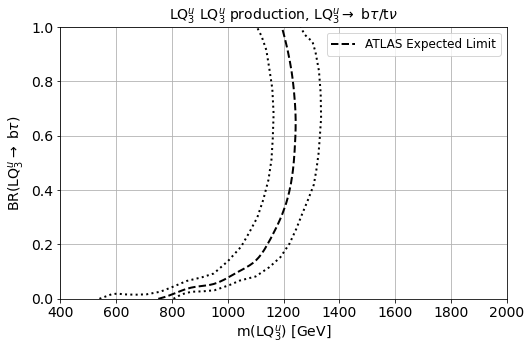

In [16]:
plt.figure(figsize = (8,5))
lw = 2
plt.plot(mass_Z95CL_ATLAS, beta_ATLAS, '--', color='black', lw=lw, label=r'ATLAS Expected Limit') 
plt.plot(mass_Z95CL_ATLAS_plus1sig, beta_ATLAS_plus1sig, ':', color='black', lw=2) 
plt.plot(mass_Z95CL_ATLAS_minus1sig, beta_ATLAS_minus1sig, ':', color='black', lw=2) 
plt.xlim([400, 2000])
plt.ylim([0., 1])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^u$) [GeV]', fontsize=14)
plt.ylabel(r'BR(LQ$_3^u \rightarrow$ b$\tau$)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'LQ$_3^u$ LQ$_3^u$ production, LQ$_3^u \rightarrow$ b$\tau$/t$\nu$', fontsize=14)
plt.legend(fontsize=12)
plt.show()

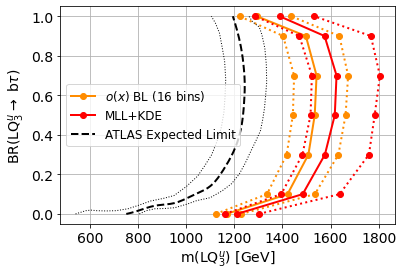

In [17]:
plt.figure()
lw = 2

plt.plot(mass_16bins, beta, '-o', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(mass_16bins_plus, beta, ':o', color='darkorange', lw=lw) 
plt.plot(mass_16bins_min, beta, ':o', color='darkorange', lw=lw)
plt.plot(mass_MLL, beta, '-o', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(mass_MLL_plus, beta, ':o', color='red', lw=lw) 
plt.plot(mass_MLL_min, beta, ':o', color='red', lw=lw) 
plt.plot(mass_Z95CL_ATLAS, beta_ATLAS, '--', color='black', lw=lw, label=r'ATLAS Expected Limit') 
plt.plot(mass_Z95CL_ATLAS_plus1sig, beta_ATLAS_plus1sig, ':', color='black', lw=1) 
plt.plot(mass_Z95CL_ATLAS_minus1sig, beta_ATLAS_minus1sig, ':', color='black', lw=1) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^u$) [GeV]', fontsize=14)
plt.ylabel(r'BR(LQ$_3^u \rightarrow$ b$\tau$)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
#plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(fontsize=12)
plt.show()

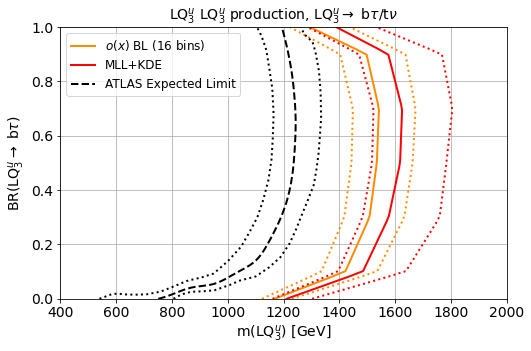

In [18]:
mass_Z95CL_16bins = interp1d(beta, mass_16bins, kind='linear')
mass_Z95CL_16bins_plus = interp1d(beta, mass_16bins_plus, kind='linear')
mass_Z95CL_16bins_min = interp1d(beta, mass_16bins_min, kind='linear')
mass_Z95CL_MLL = interp1d(beta, mass_MLL, kind='linear')
mass_Z95CL_MLL_plus = interp1d(beta, mass_MLL_plus, kind='linear')
mass_Z95CL_MLL_min = interp1d(beta, mass_MLL_min, kind='linear')

plotX_beta = np.linspace(min(beta), max(beta), num=50, endpoint=True)

#plt.figure()
plt.figure(figsize = (8,5))
lw = 2

plt.plot(mass_Z95CL_16bins(plotX_beta), plotX_beta, '-', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)') 
plt.plot(mass_Z95CL_16bins_plus(plotX_beta), plotX_beta, ':', color='darkorange', lw=lw)
plt.plot(mass_Z95CL_16bins_min(plotX_beta), plotX_beta, ':', color='darkorange', lw=lw)
plt.plot(mass_Z95CL_MLL(plotX_beta), plotX_beta, '-', color='red', lw=lw, label=r'MLL+KDE')
plt.plot(mass_Z95CL_MLL_plus(plotX_beta), plotX_beta, ':', color='red', lw=lw)
plt.plot(mass_Z95CL_MLL_min(plotX_beta), plotX_beta, ':', color='red', lw=lw)
plt.plot(mass_Z95CL_ATLAS, beta_ATLAS, '--', color='black', lw=lw, label=r'ATLAS Expected Limit') 
plt.plot(mass_Z95CL_ATLAS_plus1sig, beta_ATLAS_plus1sig, ':', color='black', lw=2) 
plt.plot(mass_Z95CL_ATLAS_minus1sig, beta_ATLAS_minus1sig, ':', color='black', lw=2) 

plt.xlim([400, 2000])
plt.ylim([0., 1])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^u$) [GeV]', fontsize=14)
plt.ylabel(r'BR(LQ$_3^u \rightarrow$ b$\tau$)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'LQ$_3^u$ LQ$_3^u$ production, LQ$_3^u \rightarrow$ b$\tau$/t$\nu$', fontsize=14)
plt.legend(fontsize=12)
plt.show()

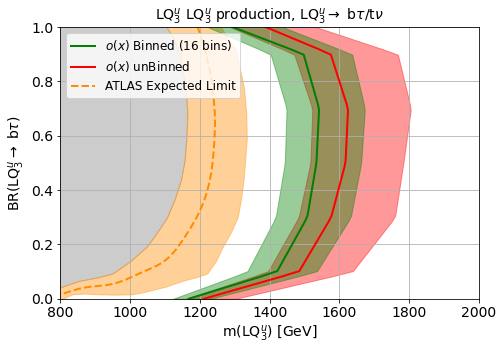

In [19]:

#plt.figure()
lw = 2

test_A = pd.DataFrame({'ATLAS_beta': beta_ATLAS_plus1sig,
                     'ATLAS_low':mass_Z95CL_ATLAS_plus1sig,
                     'ATLAS_up':mass_Z95CL_ATLAS_minus1sig})


test = pd.DataFrame({'BR': plotX_beta.tolist(),
                    'MLL_low': mass_Z95CL_MLL_plus(plotX_beta).tolist(),
                      'MLL_up': mass_Z95CL_MLL_min(plotX_beta).tolist(),
                     '16bins_low': mass_Z95CL_16bins_plus(plotX_beta).tolist(),
                      '16bins_up': mass_Z95CL_16bins_min(plotX_beta).tolist()})
mineral_names = test.columns[1:]

fig = plt.figure(figsize=(30, 5))
gs = gridspec.GridSpec(nrows=1, ncols=4, wspace=0)

ax = fig.add_subplot(gs[0, 1])
for mineral_name in mineral_names[:-1]:
    ax.plot(test[mineral_name], test['BR'], linewidth=2, color='None')
    
    
ax.fill_betweenx(test_A['ATLAS_beta'], 0, test_A['ATLAS_low'], color='gray', alpha=0.4)
ax.fill_betweenx(test_A['ATLAS_beta'], test_A['ATLAS_low'], test_A['ATLAS_up'], color='darkorange', alpha=0.4)

colors = [ "None", "red", "None", "green", "None"]
previous_curve = 0
previous_name = ''
for mineral_name, color in zip(mineral_names, colors):
    ax.fill_betweenx(test['BR'], previous_curve, test[mineral_name], color=color, alpha=0.4)
    previous_curve = test[mineral_name]
    previous_name = mineral_name
    
    
    

plt.plot(mass_Z95CL_16bins(plotX_beta), plotX_beta, '-', color='green', lw=lw, label=r'$o(x)$ Binned (16 bins)') 
plt.plot(mass_Z95CL_MLL(plotX_beta), plotX_beta, '-', color='red', lw=lw, label=r'$o(x)$ unBinned')
plt.plot(mass_Z95CL_ATLAS, beta_ATLAS, '--', color='darkorange', lw=lw, label=r'ATLAS Expected Limit') 

plt.xlim([800, 2000])
plt.ylim([0., 1])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^u$) [GeV]', fontsize=14)
plt.ylabel(r'BR(LQ$_3^u \rightarrow$ b$\tau$)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'LQ$_3^u$ LQ$_3^u$ production, LQ$_3^u \rightarrow$ b$\tau$/t$\nu$', fontsize=14)
plt.legend(loc = 'upper left', fontsize=12)
plt.savefig('exclusion_LQup_14TeV_300fb.pdf', bbox_inches='tight')
plt.show()

In [20]:
# BR values
print(plotX_beta)

[0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
 0.12244898 0.14285714 0.16326531 0.18367347 0.20408163 0.2244898
 0.24489796 0.26530612 0.28571429 0.30612245 0.32653061 0.34693878
 0.36734694 0.3877551  0.40816327 0.42857143 0.44897959 0.46938776
 0.48979592 0.51020408 0.53061224 0.55102041 0.57142857 0.59183673
 0.6122449  0.63265306 0.65306122 0.67346939 0.69387755 0.71428571
 0.73469388 0.75510204 0.7755102  0.79591837 0.81632653 0.83673469
 0.85714286 0.87755102 0.89795918 0.91836735 0.93877551 0.95918367
 0.97959184 1.        ]


In [21]:
# Mass values (BL)
print( mass_Z95CL_16bins(plotX_beta) )
print( mass_Z95CL_16bins_plus(plotX_beta) )
print( mass_Z95CL_16bins_min(plotX_beta) )

[1167.71760043 1219.47326932 1271.2289382  1322.98460709 1374.74027598
 1422.20565507 1431.05842595 1439.91119683 1448.76396771 1457.61673859
 1466.46950948 1475.32228036 1484.17505124 1493.02782212 1501.880593
 1508.88328941 1511.56914539 1514.25500136 1516.94085734 1519.62671331
 1522.31256929 1524.99842527 1527.68428124 1530.37013722 1533.05599319
 1534.78909473 1535.56944183 1536.34978892 1537.13013602 1537.91048312
 1538.69083022 1539.47117732 1540.25152441 1541.03187151 1541.81221861
 1538.86416342 1534.31822153 1529.77227963 1525.22633774 1520.68039585
 1516.13445396 1511.58851207 1507.04257018 1502.49662829 1497.95068639
 1460.02158227 1418.38323789 1376.74489352 1335.10654914 1293.46820477]
[1229.61149753 1291.95541705 1354.29933657 1416.64325608 1478.9871756
 1536.09402145 1546.06720432 1556.04038718 1566.01357004 1575.98675291
 1585.95993577 1595.93311864 1605.9063015  1615.87948436 1625.85266723
 1633.74613019 1636.78691338 1639.82769658 1642.86847977 1645.90926296
 1648.95

In [22]:
# Mass values (MLL)
print( mass_Z95CL_MLL(plotX_beta) )
print( mass_Z95CL_MLL_plus(plotX_beta) )
print( mass_Z95CL_MLL_min(plotX_beta) )

[1210.97834435 1266.76921808 1322.5600918  1378.35096553 1434.14183926
 1485.29538154 1494.71294091 1504.13050027 1513.54805963 1522.96561899
 1532.38317835 1541.80073771 1551.21829707 1560.63585644 1570.0534158
 1577.90358184 1582.0964968  1586.28941176 1590.48232672 1594.67524169
 1598.86815665 1603.06107161 1607.25398657 1611.44690154 1615.6398165
 1618.11026791 1618.85825578 1619.60624364 1620.35423151 1621.10221938
 1621.85020724 1622.59819511 1623.34618298 1624.09417084 1624.84215871
 1621.51391331 1616.43871081 1611.3635083  1606.28830579 1601.21310328
 1596.13790078 1591.06269827 1585.98749576 1580.91229326 1575.83709075
 1541.00141175 1502.85901313 1464.71661452 1426.57421591 1388.43181729]
[1302.43804734 1370.86103714 1439.28402694 1507.70701675 1576.13000655
 1638.95405568 1651.38763874 1663.8212218  1676.25480486 1688.68838792
 1701.12197098 1713.55555404 1725.9891371  1738.42272016 1750.85630322
 1760.29896239 1762.76279917 1765.22663594 1767.69047272 1770.15430949
 1772.6